# Lecture 10 Full ML process

![Machine learning diagram](./ml_diagram.png)

### First, set up a virtual environment (venv)

In the terminal (or command line interface), run this command to create a virtual environment: `python -m venv venv`

To start the virtual environment with a mac (or the git bash shell on windows) run the command: `source venv/bin/activate`

Check which python environment you are in using the command: `which python`

The purpose of virtual environments is to allow you to install different versions of python packages for different projects on your computer. I recommend setting up a virtual environment before installing Python packages.

### Install the dependencies

Run the commands:

`pip install pandas`

`pip install scikit-learn`

`pip install matplotlib`


### Set up imports

In [1]:
# import pandas, matplotlib, and the neccessary functions from scikit-learn
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

/var/folders/rt/6n0vbsp923xg2bbmtt_k12900000gn/T/ipykernel_79420/408836033.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load dataset

In [2]:
# Load the dataset using pandas and the read_csv function
thyroid_df = pd.read_csv('data/thyroid_data.csv')

thyroid_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [7]:
# inspect the shape of the dataframe
thyroid_df.shape

(383, 17)

In [8]:
# inspect the fraction of rows where Recurred is 'Yes' or 'No' using the value_counts method
thyroid_df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

### Data preprocessing (one hot encoding)
Transform categorical features into a ML-compatible format

In [9]:
# make a list of the columns names of categorical features
columns_to_exclude = ['Age', 'Recurred']

categorical_columns = [col for col in thyroid_df.columns if col not in columns_to_exclude]

categorical_columns

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [10]:
# Define a scikit learn column transformer that will encode the categorical columns using the OneHotEncoder

column_transformer = ColumnTransformer(
  transformers=[
    ('encoder', OneHotEncoder(), categorical_columns)
  ],
  remainder='passthrough'
)

# apply transformer
transformed_data = column_transformer.fit_transform(thyroid_df)

type(transformed_data)

numpy.ndarray

In [11]:
# get the names of the encoded features using the get_feature_names_out function
encoded_feature_names = column_transformer.named_transformers_['encoder'].get_feature_names_out(categorical_columns)

encoded_feature_names

array(['Gender_F', 'Gender_M', 'Smoking_No', 'Smoking_Yes',
       'Hx Smoking_No', 'Hx Smoking_Yes', 'Hx Radiothreapy_No',
       'Hx Radiothreapy_Yes', 'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', '

In [12]:
# make a list of all the feature names to use as column values in the DataFrame
all_feature_names = list(encoded_feature_names) + columns_to_exclude

all_feature_names

['Gender_F',
 'Gender_M',
 'Smoking_No',
 'Smoking_Yes',
 'Hx Smoking_No',
 'Hx Smoking_Yes',
 'Hx Radiothreapy_No',
 'Hx Radiothreapy_Yes',
 'Thyroid Function_Clinical Hyperthyroidism',
 'Thyroid Function_Clinical Hypothyroidism',
 'Thyroid Function_Euthyroid',
 'Thyroid Function_Subclinical Hyperthyroidism',
 'Thyroid Function_Subclinical Hypothyroidism',
 'Physical Examination_Diffuse goiter',
 'Physical Examination_Multinodular goiter',
 'Physical Examination_Normal',
 'Physical Examination_Single nodular goiter-left',
 'Physical Examination_Single nodular goiter-right',
 'Adenopathy_Bilateral',
 'Adenopathy_Extensive',
 'Adenopathy_Left',
 'Adenopathy_No',
 'Adenopathy_Posterior',
 'Adenopathy_Right',
 'Pathology_Follicular',
 'Pathology_Hurthel cell',
 'Pathology_Micropapillary',
 'Pathology_Papillary',
 'Focality_Multi-Focal',
 'Focality_Uni-Focal',
 'Risk_High',
 'Risk_Intermediate',
 'Risk_Low',
 'T_T1a',
 'T_T1b',
 'T_T2',
 'T_T3a',
 'T_T3b',
 'T_T4a',
 'T_T4b',
 'N_N0',
 'N_

In [13]:
# create a dataframe using the transformed data with column names from the all_feature_names list
transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)

transformed_df

,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age,Recurred
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,72,Yes
379,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,81,Yes
380,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72,Yes
381,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61,Yes


In [14]:
# inspect the shape of the transformed dataframe
transformed_df.shape

(383, 56)

### Data preprocessing (split data into training and testing data)

In [17]:
# split the transformed dataframe into a features dataframe and target series
X = transformed_df.drop('Recurred', axis=1)
y = transformed_df['Recurred']

# inspect feature dataframe
X 


,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,72
379,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,81
380,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72
381,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61


In [18]:
# inspect target series
y

0       No
1       No
2       No
3       No
4       No
      ... 
378    Yes
379    Yes
380    Yes
381    Yes
382    Yes
Name: Recurred, Length: 383, dtype: object

In [19]:
# split into training and testing sets. The training set should have 283 samples, and the testing set should have 100 samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

In [23]:
# validate that the training and testing sets have the correct number of samples
y_train.shape

(283,)

### Using the training data to perform grid search to find the best hyperparameters

In [24]:
# Define the parameter grid
param_grid = {
  'class_weight': ['balanced'],
  'criterion': ['gini', 'entropy'],
  'max_depth': [2, 4, 8],
  'max_features': ['sqrt'],
  'n_estimators': [30, 60, 90]
}

In [25]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, scoring='accuracy')

# Fit the GridSearchCV object to your data (X_train, y_train)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8], 'max_features': ['sqrt'],
                         'n_estimators': [30, 60, 90]},
             scoring='accuracy')

In [26]:
# Get and print the best parameters found by the GridSearchCV using the best_params_
best_params = grid_search.best_params_

best_params

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 60}

In [27]:
# Get the accuracy score of the model with the best parameters
best_score = grid_search.best_score_

best_score

0.9611177704525022

### Train a model using the best set of hyperparameters

In [30]:
# Initialize a new RandomForestClassifier model with the best parameters
final_model = RandomForestClassifier(
  class_weight='balanced',
  criterion='entropy',
  max_depth=8,
  max_features='sqrt',
  n_estimators=60
)

# Fit the model on your training data
final_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, n_estimators=60)

### Test the model with the testing data

In [32]:
# use the score function to get the accuracy of the model on the testing data
final_model.score(X_test, y_test)

0.97

### Get a plot the feature importances

In [40]:
# create a dataframe of the feature importances
feature_importances = final_model.feature_importances_

feature_importance_df = pd.DataFrame({
  'feature': X.columns,
  'importance': feature_importances
})

feature_importance_df

# sort the dataframe so the most important features are at the top
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)


<Axes: xlabel='feature'>

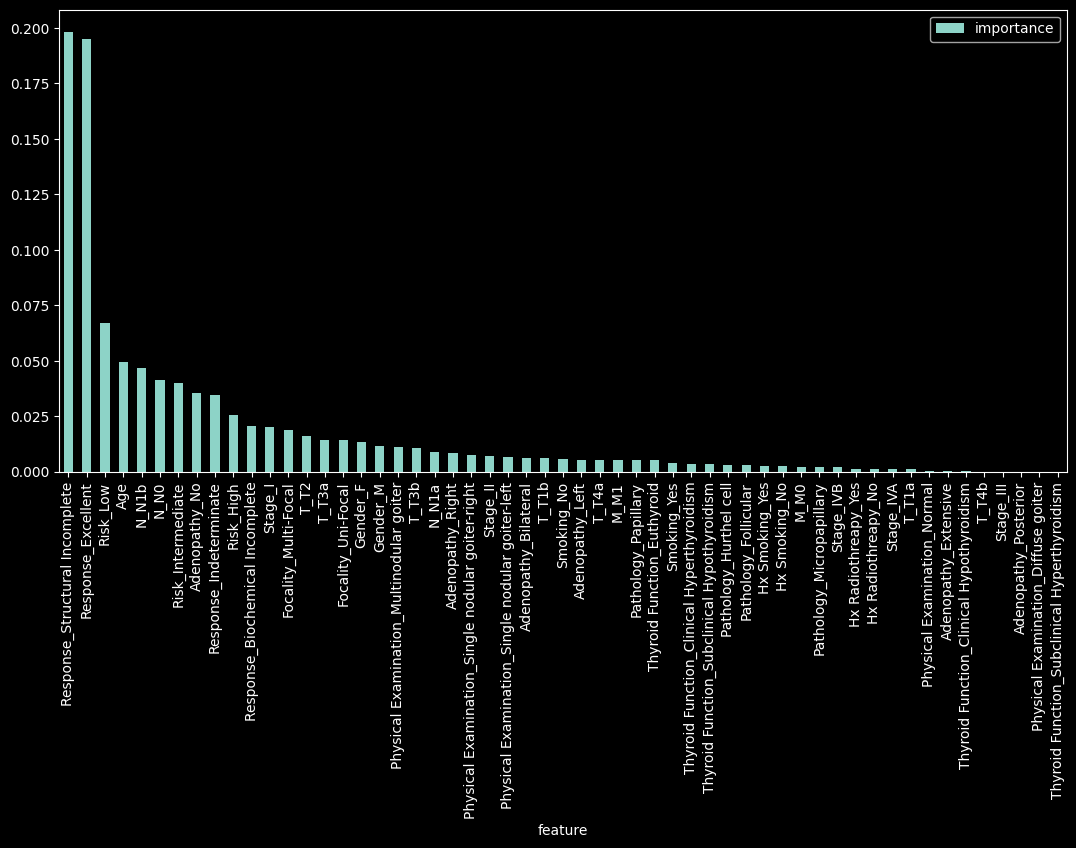

In [41]:
# plot the feature importances as a bar chart using .plot.bar()
feature_importance_df.plot.bar(x='feature', y='importance', rot=90, figsize=(13, 6))